# BTM539 Project [Analyzing Vehicle CO2 Emission]_Analysis

## Data Preprocessing

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import seaborn as sns
pd.set_option('mode.chained_assignment',  None) #경고 끄기
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) #경고끄기

In [2]:
df = pd.read_csv('95-23_data.csv')

In [3]:
df.shape

(26950, 16)

In [100]:
len(df['brand'].unique())

55

In [4]:
df.head()

,ID,Year,SINCE1995,Make,Model,Hybrid,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,1995ACURAINTEGRA,1995,1,ACURA,INTEGRA,0,SUBCOMPACT,1.8,4,A4,X,10.2,7.0,8.8,32,202
1,1995ACURAINTEGRA,1995,1,ACURA,INTEGRA,0,SUBCOMPACT,1.8,4,M5,X,9.6,7.0,8.4,34,193
2,1995ACURAINTEGRAGS-R,1995,1,ACURA,INTEGRAGS-R,0,SUBCOMPACT,1.8,4,M5,Z,9.4,7.0,8.3,34,191
3,1995ACURALEGEND,1995,1,ACURA,LEGEND,0,COMPACT,3.2,6,A4,Z,12.6,8.9,10.9,26,251
4,1995ACURALEGENDCOUPE,1995,1,ACURA,LEGENDCOUPE,0,COMPACT,3.2,6,A4,Z,13.0,9.3,11.3,25,260


In [5]:
df.rename(columns ={'Year' : 'year',
                    'SINCE1995' : 'period',
                    'Make' : "brand",
                    'Model' : "model",
                    'Hybrid' : 'hybrid',
                    'Vehicle Class' :  "vehicle_class",
                    'Engine Size(L)': "engine_size",
                    'Cylinders': "cylinders",
                   'Transmission' : "transmission",
                    'Fuel Type' : "fuel_type",
                    'Fuel Consumption City (L/100 km)' : "fuel_cons_city",
                   'Fuel Consumption Hwy (L/100 km)': "fuel_cons_hwy",
                    'Fuel Consumption Comb (L/100 km)' :"fuel_cons_comb",
                   'Fuel Consumption Comb (mpg)' : "fuel_cons_comb_mpg", 
                    'CO2 Emissions(g/km)' : "co2"
                   }, inplace = True)

In [6]:
df["gears"] = df["transmission"].copy()
# 주어진 문자열에서 숫자만 추출
df["gears"] = df["gears"].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else 0) # AV는 기어비라는 개념이 적용되지 않음 (0)
# 주어진 문자열에서 알파벳만 추출
df["transmission"] = df["transmission"].apply(lambda x: re.findall("[A-Za-z]+", str(x))[0] if re.findall("[A-Za-z]+", str(x)) else None)
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
df['hybrid'] =df['hybrid'].astype('uint8')
df["gears"] = df["gears"].astype(int)
df = df[['year', 'period','brand', 'model','hybrid', 'vehicle_class', 'engine_size', 'cylinders',
          'transmission', 'gears', 'fuel_type', 'fuel_cons_comb', 'co2']]
#gears ile transmission sütunlarını yan yana görmek için sütun sırasını tekrar düzenledim
df.head(5)

,year,period,brand,model,hybrid,vehicle_class,engine_size,cylinders,transmission,gears,fuel_type,fuel_cons_comb,co2
0,1995,1,ACURA,INTEGRA,0,SUBCOMPACT,1.8,4,A,4,X,8.8,202
1,1995,1,ACURA,INTEGRA,0,SUBCOMPACT,1.8,4,M,5,X,8.4,193
2,1995,1,ACURA,INTEGRAGS-R,0,SUBCOMPACT,1.8,4,M,5,Z,8.3,191
3,1995,1,ACURA,LEGEND,0,COMPACT,3.2,6,A,4,Z,10.9,251
4,1995,1,ACURA,LEGENDCOUPE,0,COMPACT,3.2,6,A,4,Z,11.3,260


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26950 entries, 0 to 26949
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            26950 non-null  int64  
 1   period          26950 non-null  int64  
 2   brand           26950 non-null  object 
 3   model           26950 non-null  object 
 4   hybrid          26950 non-null  uint8  
 5   vehicle_class   26950 non-null  object 
 6   engine_size     26950 non-null  float64
 7   cylinders       26950 non-null  int64  
 8   transmission    26950 non-null  object 
 9   gears           26950 non-null  int32  
 10  fuel_type       26950 non-null  object 
 11  fuel_cons_comb  26950 non-null  float64
 12  co2             26950 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(5), uint8(1)
memory usage: 2.4+ MB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26950.0,2010.008237,7.957642,1995.0,2004.0,2010.0,2017.0,2023.0
period,26950.0,16.008237,7.957642,1.0,10.0,16.0,23.0,29.0
hybrid,26950.0,0.021299,0.144381,0.0,0.0,0.0,0.0,1.0
engine_size,26950.0,3.348100,1.342591,0.8,2.3,3.0,4.2,8.4
cylinders,26950.0,5.836549,1.801960,2.0,4.0,6.0,8.0,16.0
gears,26950.0,5.638145,1.829652,0.0,4.0,6.0,6.0,10.0
fuel_cons_comb,26950.0,11.074846,2.890147,3.6,9.1,10.6,12.8,26.1
co2,26950.0,251.825195,60.164895,83.0,210.0,244.0,290.0,608.0


In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum()

year              0
period            0
brand             0
model             0
hybrid            0
vehicle_class     0
engine_size       0
cylinders         0
transmission      0
gears             0
fuel_type         0
fuel_cons_comb    0
co2               0
dtype: int64

In [11]:
df.drop_duplicates(inplace=True) # 중복 제거
df.shape

(26930, 13)

In [12]:
# one-hot encoding (hybrid)
#dummy_hybrid = pd.get_dummies(df['hybrid'], prefix='hybrid')
dummy_brand = pd.get_dummies(df['brand'], prefix='brand')
dummy_vehicle_class = pd.get_dummies(df['vehicle_class'], prefix='vehicle_class')
dummy_transmission = pd.get_dummies(df['transmission'], prefix='transmission')
dummy_fuel_type = pd.get_dummies(df['fuel_type'], prefix='fuel_type')
onehot_df = pd.concat([df, dummy_brand, dummy_vehicle_class, dummy_transmission, dummy_fuel_type], axis=1)
onehot_df['hybrid'] = onehot_df['hybrid'].astype('uint8')

In [23]:
onehot_df = onehot_df[['period', 'hybrid', 'engine_size', 'cylinders', 'gears', 'fuel_cons_comb', 'co2',
                       'brand_ACURA', 'brand_ALFAROMEO', 'brand_ASTONMARTIN', 'brand_AUDI', 'brand_BENTLEY', 'brand_BMW',
                       'brand_BUICK', 'brand_CADILLAC', 'brand_CHEVROLET','brand_CHRYSLER','brand_DODGE', 'brand_FIAT', 
                       'brand_FORD', 'brand_GENESIS','brand_GMC', 'brand_HONDA','brand_HYUNDAI', 'brand_JAGUAR',
                       'brand_JEEP', 'brand_KIA', 'brand_LAMBORGHINI', 'brand_LANDROVER','brand_LEXUS', 'brand_LINCOLN',
                       'brand_MASERATI','brand_MERCEDES-BENZ','brand_MINI', 'brand_PORSCHE','brand_ROLLS-ROYCE', 
                       'brand_TOYOTA', 'brand_VOLKSWAGEN', 'brand_VOLVO',
                       'vehicle_class_COMPACT', 'vehicle_class_FULL-SIZE',
                       'vehicle_class_MID-SIZE', 'vehicle_class_MINICOMPACT',
                       'vehicle_class_MINIVAN', 'vehicle_class_PICKUPTRUCK-SMALL',
                       'vehicle_class_PICKUPTRUCK-STANDARD',
                       'vehicle_class_SPECIALPURPOSEVEHICLE',
                       'vehicle_class_STATIONWAGON-MID-SIZE',
                       'vehicle_class_STATIONWAGON-SMALL', 'vehicle_class_SUBCOMPACT',
                       'vehicle_class_SUV', 'vehicle_class_SUV-SMALL',
                       'vehicle_class_SUV-STANDARD', 'vehicle_class_TWO-SEATER',
                       'vehicle_class_VAN-CARGO', 'vehicle_class_VAN-PASSENGER',
                       'transmission_A', 'transmission_AM', 'transmission_AS',
                       'transmission_AV', 'transmission_M', 'fuel_type_D', 'fuel_type_E',
                       'fuel_type_N', 'fuel_type_X', 'fuel_type_Z'
                                      ]]

In [24]:
onehot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26930 entries, 0 to 26949
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   period                               26930 non-null  int64  
 1   hybrid                               26930 non-null  uint8  
 2   engine_size                          26930 non-null  float64
 3   cylinders                            26930 non-null  int64  
 4   gears                                26930 non-null  int32  
 5   fuel_cons_comb                       26930 non-null  float64
 6   co2                                  26930 non-null  int64  
 7   brand_ACURA                          26930 non-null  uint8  
 8   brand_ALFAROMEO                      26930 non-null  uint8  
 9   brand_ASTONMARTIN                    26930 non-null  uint8  
 10  brand_AUDI                           26930 non-null  uint8  
 11  brand_BENTLEY               

## Preview

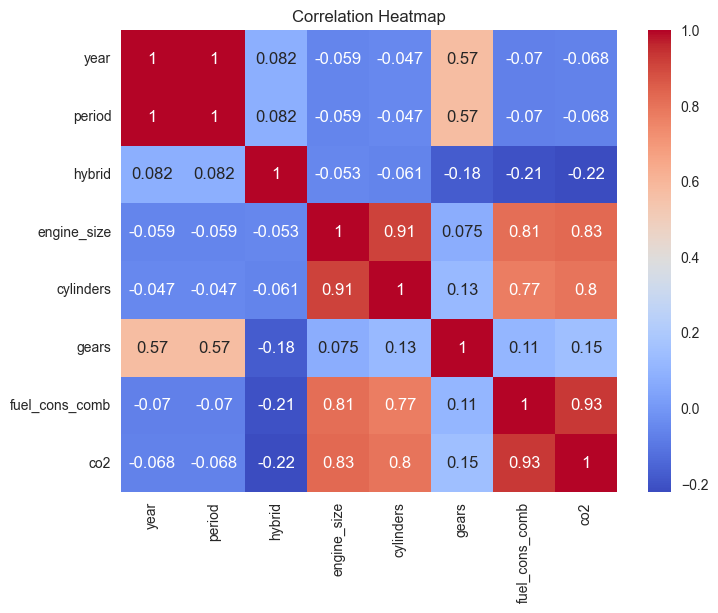

In [102]:
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

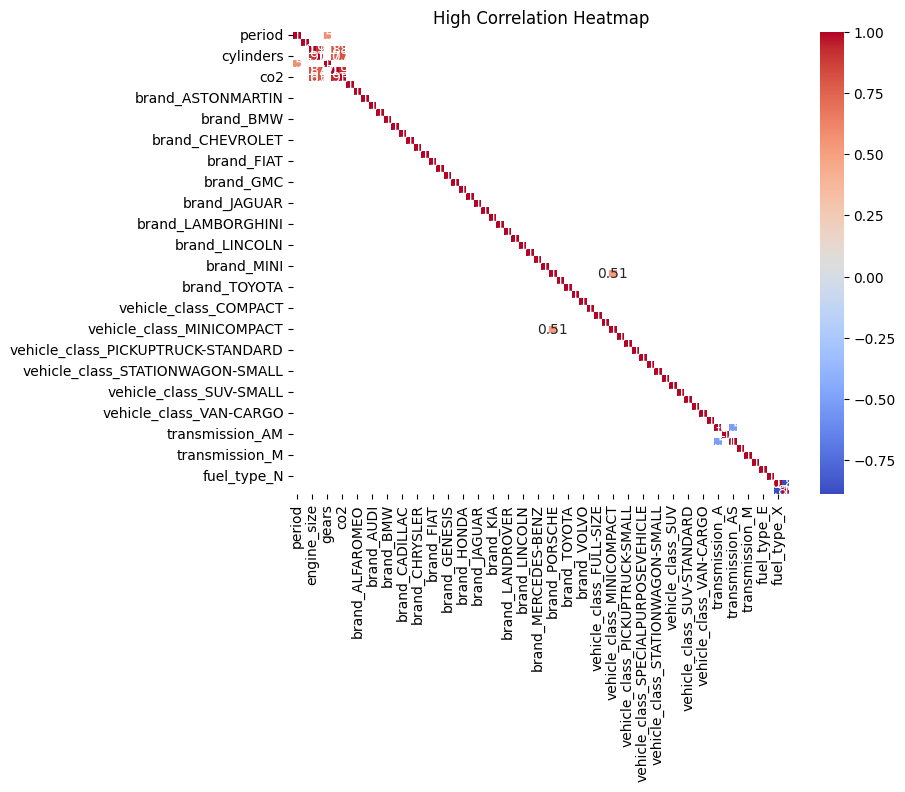

In [17]:
# all variable correlation
all_corr = onehot_df.corr()
high_corr = all_corr[np.abs(all_corr) > 0.5]

plt.figure(figsize=(8, 6))
sns.heatmap(high_corr, annot=True, cmap='coolwarm')
plt.title('High Correlation Heatmap')
plt.show()

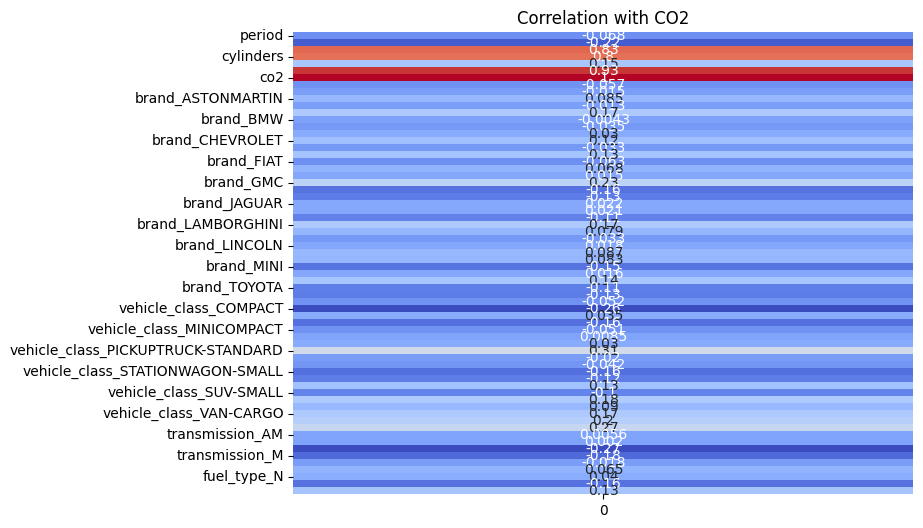

In [18]:
# correlation with 'co2'
co2_corr = onehot_df.corrwith(onehot_df['co2'])
plt.figure(figsize=(8, 6))
sns.heatmap(co2_corr.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title(f'Correlation with CO2')
plt.show()

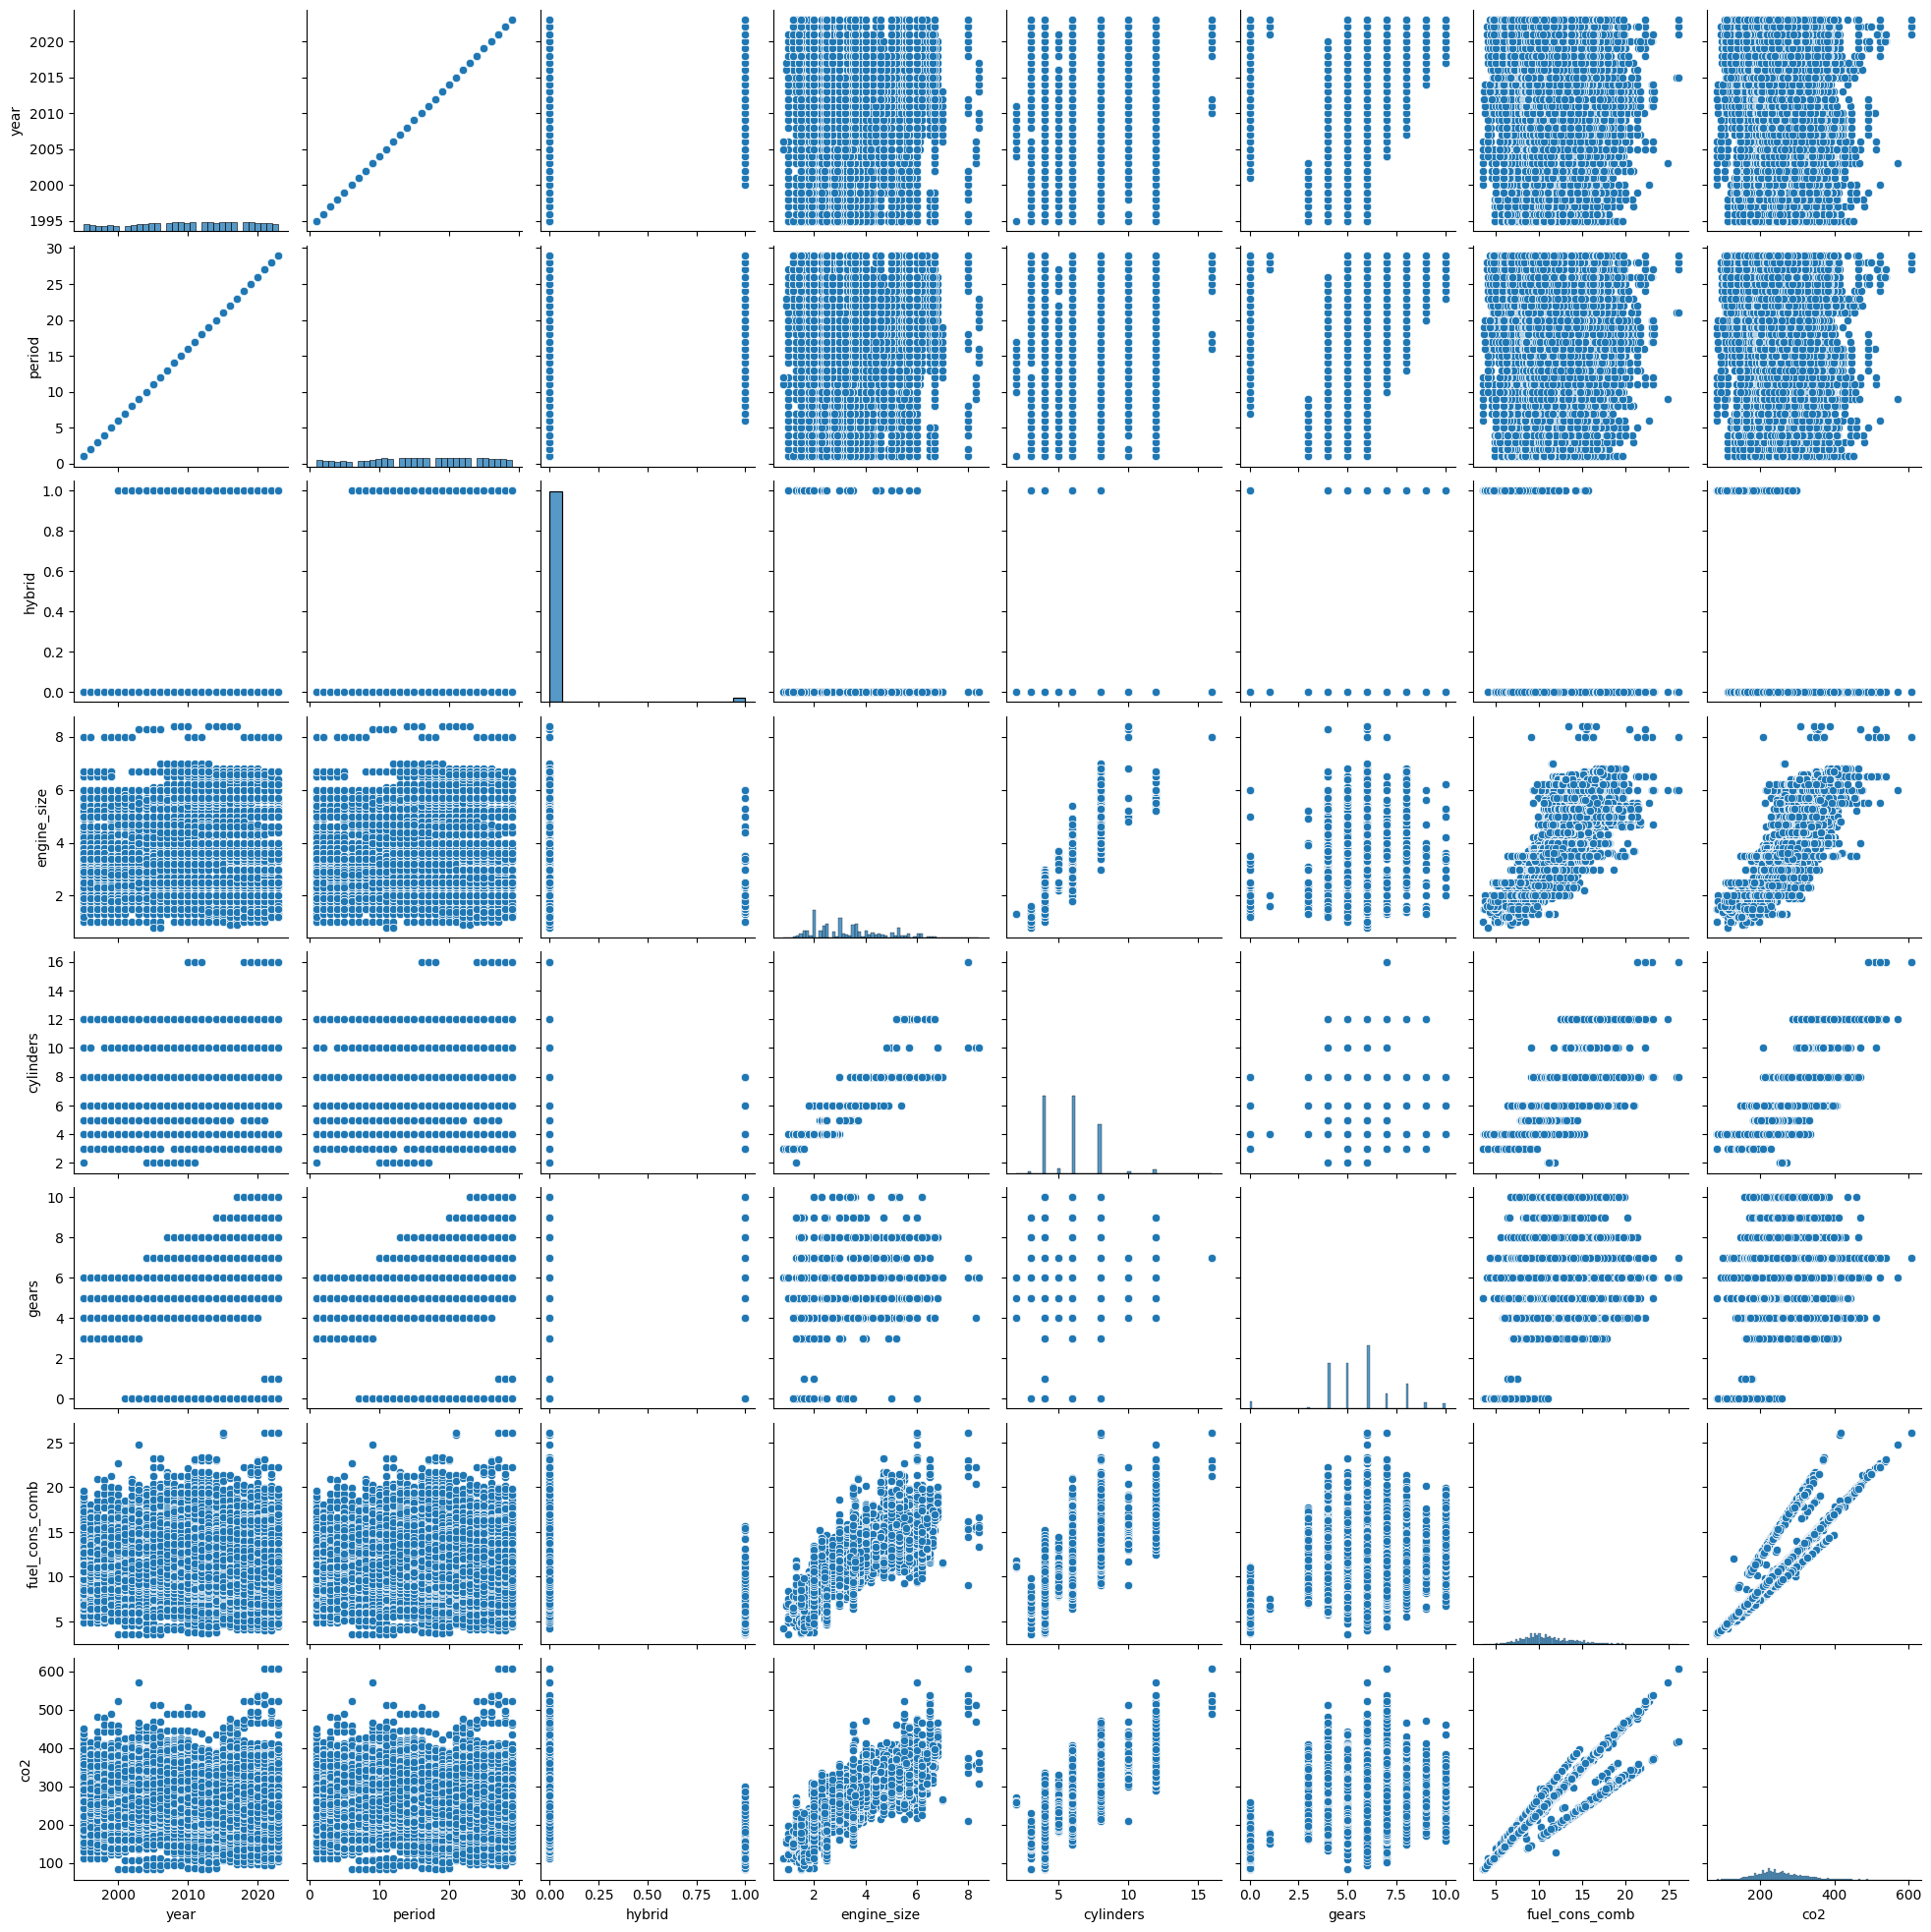

In [19]:
sns.pairplot(df)
plt.show()

## (1) total regression for co2

In [20]:
from pycaret.regression import *

In [25]:
train1 = onehot_df
categorical_cols = [col for col in train1.columns if train1[col].dtype == object or train1[col].dtype == 'uint8']
print(categorical_cols)
print('\n')
numerical_cols = [col for col in train1.columns if col not in categorical_cols]
numerical_cols.remove("co2")
print(numerical_cols)

['hybrid', 'brand_ACURA', 'brand_ALFAROMEO', 'brand_ASTONMARTIN', 'brand_AUDI', 'brand_BENTLEY', 'brand_BMW', 'brand_BUICK', 'brand_CADILLAC', 'brand_CHEVROLET', 'brand_CHRYSLER', 'brand_DODGE', 'brand_FIAT', 'brand_FORD', 'brand_GENESIS', 'brand_GMC', 'brand_HONDA', 'brand_HYUNDAI', 'brand_JAGUAR', 'brand_JEEP', 'brand_KIA', 'brand_LAMBORGHINI', 'brand_LANDROVER', 'brand_LEXUS', 'brand_LINCOLN', 'brand_MASERATI', 'brand_MERCEDES-BENZ', 'brand_MINI', 'brand_PORSCHE', 'brand_ROLLS-ROYCE', 'brand_TOYOTA', 'brand_VOLKSWAGEN', 'brand_VOLVO', 'vehicle_class_COMPACT', 'vehicle_class_FULL-SIZE', 'vehicle_class_MID-SIZE', 'vehicle_class_MINICOMPACT', 'vehicle_class_MINIVAN', 'vehicle_class_PICKUPTRUCK-SMALL', 'vehicle_class_PICKUPTRUCK-STANDARD', 'vehicle_class_SPECIALPURPOSEVEHICLE', 'vehicle_class_STATIONWAGON-MID-SIZE', 'vehicle_class_STATIONWAGON-SMALL', 'vehicle_class_SUBCOMPACT', 'vehicle_class_SUV', 'vehicle_class_SUV-SMALL', 'vehicle_class_SUV-STANDARD', 'vehicle_class_TWO-SEATER', 've

In [26]:
reg1 = setup(data=train1,
            target="co2",
            categorical_features=categorical_cols,
            numeric_features=numerical_cols,
            normalize=True,
            remove_multicollinearity=True,
            session_id=42)

,Description,Value
0,Session id,42
1,Target,co2
2,Target type,Regression
3,Original data shape,"(26930, 66)"
4,Transformed data shape,"(26930, 65)"
5,Transformed train set shape,"(18851, 65)"
6,Transformed test set shape,"(8079, 65)"
7,Ordinal features,60
8,Numeric features,5
9,Categorical features,60


In [27]:
best_reg1 = compare_models(round=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.5506,1.5047,1.1750,0.9996,0.0050,0.0023,2.6410
xgboost,Extreme Gradient Boosting,0.4945,1.9084,1.3049,0.9995,0.0056,0.0020,2.2970
et,Extra Trees Regressor,0.4146,2.5879,1.5231,0.9993,0.0062,0.0017,3.7230
rf,Random Forest Regressor,0.3504,2.4178,1.4774,0.9993,0.0062,0.0014,3.4240
dt,Decision Tree Regressor,0.3308,3.5448,1.7270,0.9990,0.0075,0.0014,1.6480
lightgbm,Light Gradient Boosting Machine,0.6407,3.5399,1.8330,0.9990,0.0073,0.0026,1.7880
gbr,Gradient Boosting Regressor,1.0673,3.6897,1.8961,0.9990,0.0076,0.0042,1.9550
lr,Linear Regression,2.1417,19.3556,4.3970,0.9947,0.0198,0.0087,3.2140
ridge,Ridge Regression,2.1460,19.3582,4.3973,0.9947,0.0198,0.0087,1.6410
br,Bayesian Ridge,2.1435,19.3581,4.3972,0.9947,0.0198,0.0087,1.7760


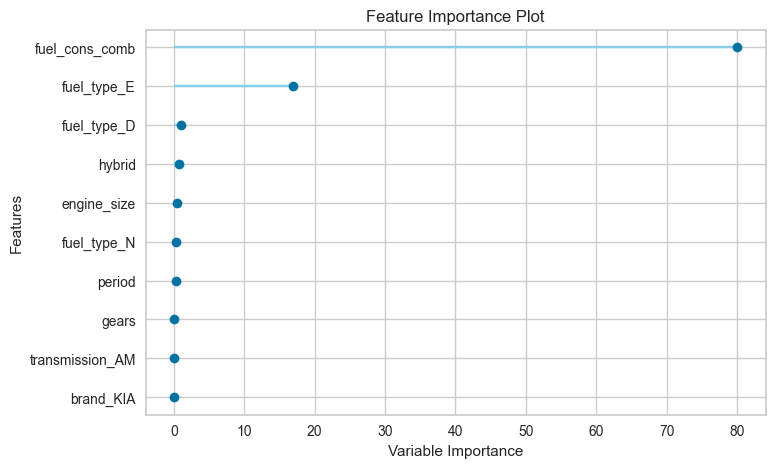

In [112]:
plot_model(best_reg1, plot='feature')

In [110]:
evaluate_model(best_reg1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predict_model(best_reg1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.5393,1.0545,1.0269,0.9997,0.0041,0.0022


,period,hybrid,engine_size,cylinders,gears,fuel_cons_comb,brand_ACURA,brand_ALFAROMEO,brand_ASTONMARTIN,brand_AUDI,...,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z,co2,prediction_label
22156,25,0,3.5,6,9,10.8,1,0,0,0,...,1,0,0,0,0,0,0,1,252,253.021627
10519,14,0,3.4,5,5,10.4,0,0,0,0,...,0,0,0,0,0,0,1,0,239,239.372388
22926,25,0,4.0,8,9,11.3,0,0,0,0,...,0,0,0,0,0,0,0,1,265,264.774112
10597,14,0,3.9,6,4,14.9,0,0,0,0,...,0,0,0,0,1,0,0,0,238,239.024063
15578,18,0,2.0,4,0,7.2,0,0,0,0,...,0,1,0,0,0,0,1,0,166,165.858541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25367,28,0,5.3,8,10,13.4,0,0,0,0,...,0,0,0,0,0,0,1,0,314,314.514966
87,1,0,3.1,6,4,9.6,0,0,0,0,...,0,0,0,0,0,0,1,0,221,221.278105
17998,21,0,2.0,4,0,9.4,0,0,0,0,...,0,1,0,0,0,0,1,0,216,215.984890
12275,15,0,3.6,6,7,9.7,0,0,0,0,...,1,0,0,0,0,0,0,1,223,222.669963


In [42]:
co2_reg = finalize_model(best_reg1)

## (2) total regression for fuel

In [ ]:
df['brand'].unique()

In [116]:
train2 = onehot_df

In [117]:
#train2 = train2.drop(columns=['brand_BUGATTI', 'brand_INFINITI', 'brand_MAZDA',
#                             'brand_MITSUBISHI', 'brand_NISSAN', 'brand_SCION',
#                             'brand_SMART', 'brand_SUBARU'], inplace=True)
categorical_cols = [col for col in train2.columns if train2[col].dtype == object or train2[col].dtype == 'uint8']
print(categorical_cols)
print('\n')
numerical_cols = [col for col in train2.columns if col not in categorical_cols]
numerical_cols.remove("co2")
numerical_cols.remove('fuel_cons_comb')
print(numerical_cols)

['hybrid', 'brand_ACURA', 'brand_ALFAROMEO', 'brand_ASTONMARTIN', 'brand_AUDI', 'brand_BENTLEY', 'brand_BMW', 'brand_BUICK', 'brand_CADILLAC', 'brand_CHEVROLET', 'brand_CHRYSLER', 'brand_DODGE', 'brand_FIAT', 'brand_FORD', 'brand_GENESIS', 'brand_GMC', 'brand_HONDA', 'brand_HYUNDAI', 'brand_JAGUAR', 'brand_JEEP', 'brand_KIA', 'brand_LAMBORGHINI', 'brand_LANDROVER', 'brand_LEXUS', 'brand_LINCOLN', 'brand_MASERATI', 'brand_MERCEDES-BENZ', 'brand_MINI', 'brand_PORSCHE', 'brand_ROLLS-ROYCE', 'brand_TOYOTA', 'brand_VOLKSWAGEN', 'brand_VOLVO', 'vehicle_class_COMPACT', 'vehicle_class_FULL-SIZE', 'vehicle_class_MID-SIZE', 'vehicle_class_MINICOMPACT', 'vehicle_class_MINIVAN', 'vehicle_class_PICKUPTRUCK-SMALL', 'vehicle_class_PICKUPTRUCK-STANDARD', 'vehicle_class_SPECIALPURPOSEVEHICLE', 'vehicle_class_STATIONWAGON-MID-SIZE', 'vehicle_class_STATIONWAGON-SMALL', 'vehicle_class_SUBCOMPACT', 'vehicle_class_SUV', 'vehicle_class_SUV-SMALL', 'vehicle_class_SUV-STANDARD', 'vehicle_class_TWO-SEATER', 've

In [118]:
train2.columns

Index(['period', 'hybrid', 'engine_size', 'cylinders', 'gears',
       'fuel_cons_comb', 'co2', 'brand_ACURA', 'brand_ALFAROMEO',
       'brand_ASTONMARTIN', 'brand_AUDI', 'brand_BENTLEY', 'brand_BMW',
       'brand_BUICK', 'brand_CADILLAC', 'brand_CHEVROLET', 'brand_CHRYSLER',
       'brand_DODGE', 'brand_FIAT', 'brand_FORD', 'brand_GENESIS', 'brand_GMC',
       'brand_HONDA', 'brand_HYUNDAI', 'brand_JAGUAR', 'brand_JEEP',
       'brand_KIA', 'brand_LAMBORGHINI', 'brand_LANDROVER', 'brand_LEXUS',
       'brand_LINCOLN', 'brand_MASERATI', 'brand_MERCEDES-BENZ', 'brand_MINI',
       'brand_PORSCHE', 'brand_ROLLS-ROYCE', 'brand_TOYOTA',
       'brand_VOLKSWAGEN', 'brand_VOLVO', 'vehicle_class_COMPACT',
       'vehicle_class_FULL-SIZE', 'vehicle_class_MID-SIZE',
       'vehicle_class_MINICOMPACT', 'vehicle_class_MINIVAN',
       'vehicle_class_PICKUPTRUCK-SMALL', 'vehicle_class_PICKUPTRUCK-STANDARD',
       'vehicle_class_SPECIALPURPOSEVEHICLE',
       'vehicle_class_STATIONWAGON-MID-SIZE

In [119]:
reg2 = setup(data=train2,
            target="fuel_cons_comb",
            categorical_features=categorical_cols,
            numeric_features=numerical_cols,
            ignore_features = ['co2'],
            normalize=True,
            remove_multicollinearity=True,
            session_id=42)

,Description,Value
0,Session id,42
1,Target,fuel_cons_comb
2,Target type,Regression
3,Original data shape,"(26930, 66)"
4,Transformed data shape,"(26930, 64)"
5,Transformed train set shape,"(18851, 64)"
6,Transformed test set shape,"(8079, 64)"
7,Ignore features,1
8,Ordinal features,60
9,Numeric features,4


In [33]:
best_reg2 = compare_models(round=4)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,0.4175,0.3885,0.6229,0.9532,0.0489,0.0375,3.7800
et,Extra Trees Regressor,0.4151,0.4174,0.6459,0.9498,0.0513,0.0373,3.8150
xgboost,Extreme Gradient Boosting,0.4757,0.4295,0.6552,0.9483,0.0526,0.0434,2.5410
catboost,CatBoost Regressor,0.4938,0.4518,0.6720,0.9456,0.0539,0.0450,2.6110
dt,Decision Tree Regressor,0.4461,0.5310,0.7282,0.9361,0.0572,0.0401,1.6820
lightgbm,Light Gradient Boosting Machine,0.5559,0.5740,0.7574,0.9309,0.0611,0.0510,1.6720
knn,K Neighbors Regressor,0.5769,0.6995,0.8362,0.9158,0.0680,0.0530,1.7060
gbr,Gradient Boosting Regressor,0.7403,1.0080,1.0037,0.8787,0.0802,0.0679,1.8520
lar,Least Angle Regression,0.8405,1.2606,1.1223,0.8484,0.0904,0.0774,1.7300
br,Bayesian Ridge,0.8404,1.2605,1.1223,0.8484,0.0904,0.0774,1.7030


In [ ]:
#tuned_reg2 = tune_model(best_reg2)

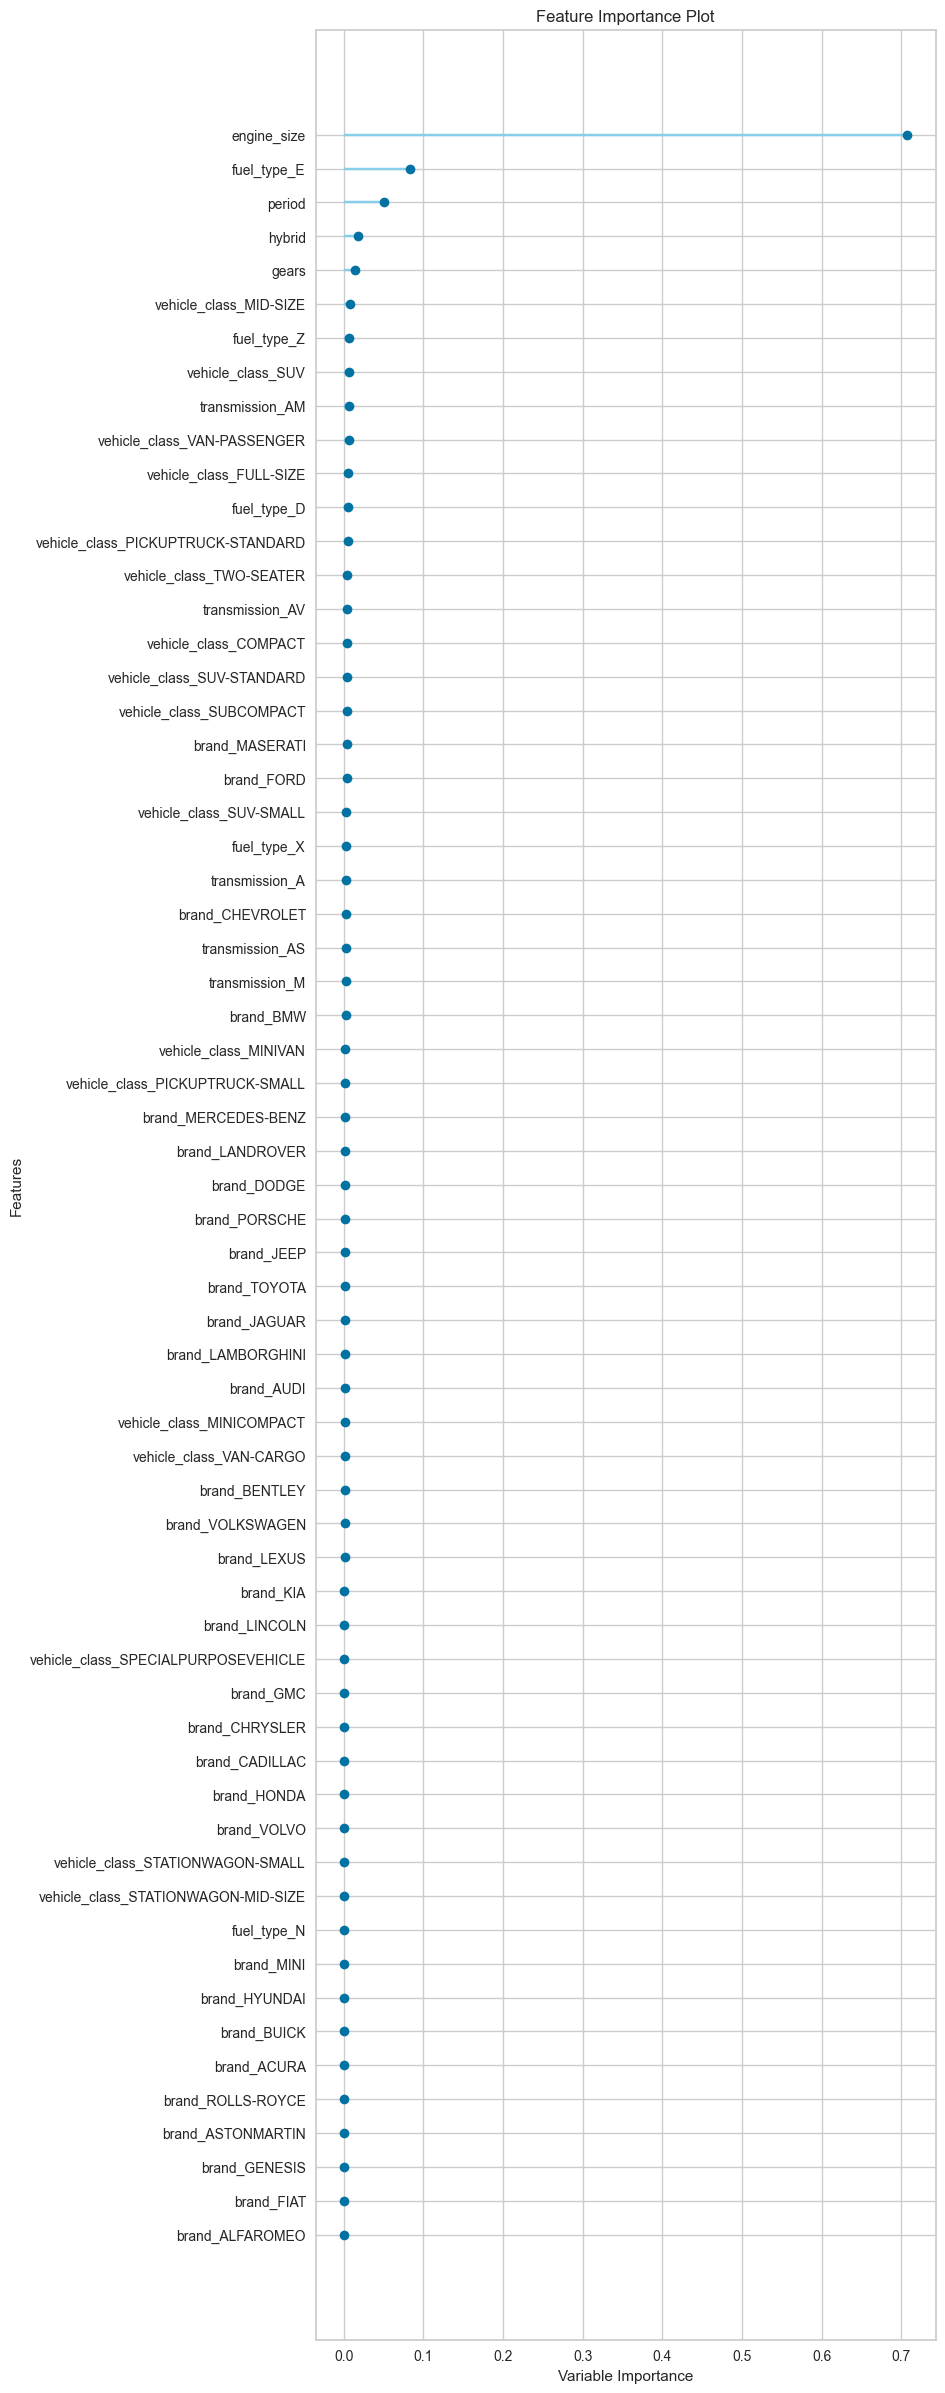

In [34]:
plot_model(best_reg2, plot='feature_all')

In [35]:
predict_model(best_reg2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,0.4054,0.3639,0.6032,0.9569,0.0475,0.0364


,period,hybrid,engine_size,cylinders,gears,brand_ACURA,brand_ALFAROMEO,brand_ASTONMARTIN,brand_AUDI,brand_BENTLEY,...,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z,fuel_cons_comb,prediction_label
22156,25,0,3.5,6,9,1,0,0,0,0,...,1,0,0,0,0,0,0,1,10.8,10.974033
10519,14,0,3.4,5,5,0,0,0,0,0,...,0,0,0,0,0,0,1,0,10.4,10.675033
22926,25,0,4.0,8,9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,11.3,12.041967
10597,14,0,3.9,6,4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,14.9,14.927643
15578,18,0,2.0,4,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,7.2,7.282571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25367,28,0,5.3,8,10,0,0,0,0,0,...,0,0,0,0,0,0,1,0,13.4,14.854519
87,1,0,3.1,6,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,9.6,10.070203
17998,21,0,2.0,4,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,9.4,9.378000
12275,15,0,3.6,6,7,0,0,0,0,0,...,1,0,0,0,0,0,0,1,9.7,9.599975


In [ ]:
predict_fuel.feature_importances_

In [120]:
best_reg2 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4255,0.4195,0.6477,0.9515,0.0498,0.0381
1,0.4088,0.3653,0.6044,0.9562,0.0486,0.0373
2,0.4337,0.4078,0.6386,0.9506,0.0511,0.0392
3,0.4124,0.3912,0.6255,0.9549,0.0494,0.0373
4,0.4152,0.3693,0.6077,0.9551,0.0483,0.0374
5,0.4200,0.4428,0.6654,0.9481,0.0491,0.0368
6,0.4201,0.3717,0.6097,0.9554,0.0486,0.0377
7,0.4074,0.3501,0.5917,0.9581,0.0466,0.0367
8,0.4161,0.3741,0.6116,0.9542,0.0480,0.0373


In [123]:
fuel_reg = finalize_model(best_reg2)

## predict future fuel & co2

In [121]:
future = pd.read_csv('dummy_future.csv')

In [136]:
future

,period,hybrid,engine_size,cylinders,gears,brand_ACURA,brand_ALFAROMEO,brand_ASTONMARTIN,brand_AUDI,brand_BENTLEY,...,transmission_A,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
13596,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
13597,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
13598,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [122]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   period                               13600 non-null  int64  
 1   hybrid                               13600 non-null  int64  
 2   engine_size                          13600 non-null  float64
 3   cylinders                            13600 non-null  float64
 4   gears                                13600 non-null  float64
 5   brand_ACURA                          13600 non-null  int64  
 6   brand_ALFAROMEO                      13600 non-null  int64  
 7   brand_ASTONMARTIN                    13600 non-null  int64  
 8   brand_AUDI                           13600 non-null  int64  
 9   brand_BENTLEY                        13600 non-null  int64  
 10  brand_BMW                            13600 non-null  int64  
 11  brand_BUICK                 

In [131]:
predict_fuel = predict_model(fuel_reg, data=future)

In [132]:
predict_fuel

,period,hybrid,engine_size,cylinders,gears,brand_ACURA,brand_ALFAROMEO,brand_ASTONMARTIN,brand_AUDI,brand_BENTLEY,...,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z,prediction_label
0,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9.172217
1,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9.084933
2,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9.164517
3,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,9.133717
4,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,15.402793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,6.543900
13596,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,6.603900
13597,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,6.543900
13598,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,6.543900


In [133]:
predict_fuel.rename(columns={'prediction_label' : 'fuel_cons_comb'}, inplace=True)

In [134]:
predict_fuel.to_csv('predict_fuel.csv')

In [135]:
predict_fuel

,period,hybrid,engine_size,cylinders,gears,brand_ACURA,brand_ALFAROMEO,brand_ASTONMARTIN,brand_AUDI,brand_BENTLEY,...,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z,fuel_cons_comb
0,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,9.172217
1,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9.084933
2,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,9.164517
3,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,9.133717
4,46,1,2.740645,5.035484,6.025806,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,15.402793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,6.543900
13596,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,6.603900
13597,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,6.543900
13598,36,1,2.466830,4.986928,5.746732,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,6.543900


In [137]:
predict_fuel = predict_fuel[['period', 'hybrid', 'engine_size', 'cylinders', 'gears',
                               'fuel_cons_comb','brand_ACURA', 'brand_ALFAROMEO',
                               'brand_ASTONMARTIN', 'brand_AUDI', 'brand_BENTLEY', 'brand_BMW',
                               'brand_BUICK', 'brand_CADILLAC', 'brand_CHEVROLET', 'brand_CHRYSLER',
                               'brand_DODGE', 'brand_FIAT', 'brand_FORD', 'brand_GENESIS', 'brand_GMC',
                               'brand_HONDA', 'brand_HYUNDAI', 'brand_JAGUAR', 'brand_JEEP',
                               'brand_KIA', 'brand_LAMBORGHINI', 'brand_LANDROVER', 'brand_LEXUS',
                               'brand_LINCOLN', 'brand_MASERATI', 'brand_MERCEDES-BENZ', 'brand_MINI',
                               'brand_PORSCHE', 'brand_ROLLS-ROYCE', 'brand_TOYOTA',
                               'brand_VOLKSWAGEN', 'brand_VOLVO', 'vehicle_class_COMPACT',
                               'vehicle_class_FULL-SIZE', 'vehicle_class_MID-SIZE',
                               'vehicle_class_MINICOMPACT', 'vehicle_class_MINIVAN',
                               'vehicle_class_PICKUPTRUCK-SMALL', 'vehicle_class_PICKUPTRUCK-STANDARD',
                               'vehicle_class_SPECIALPURPOSEVEHICLE',
                               'vehicle_class_STATIONWAGON-MID-SIZE',
                               'vehicle_class_STATIONWAGON-SMALL', 'vehicle_class_SUBCOMPACT',
                               'vehicle_class_SUV', 'vehicle_class_SUV-SMALL',
                               'vehicle_class_SUV-STANDARD', 'vehicle_class_TWO-SEATER',
                               'vehicle_class_VAN-CARGO', 'vehicle_class_VAN-PASSENGER',
                               'transmission_A', 'transmission_AM', 'transmission_AS',
                               'transmission_AV', 'transmission_M', 'fuel_type_D', 'fuel_type_E',
                               'fuel_type_N', 'fuel_type_X', 'fuel_type_Z']]

In [138]:
predict_fuel['co2'] = int(0)

In [139]:
predict_fuel.columns

Index(['period', 'hybrid', 'engine_size', 'cylinders', 'gears',
       'fuel_cons_comb', 'brand_ACURA', 'brand_ALFAROMEO', 'brand_ASTONMARTIN',
       'brand_AUDI', 'brand_BENTLEY', 'brand_BMW', 'brand_BUICK',
       'brand_CADILLAC', 'brand_CHEVROLET', 'brand_CHRYSLER', 'brand_DODGE',
       'brand_FIAT', 'brand_FORD', 'brand_GENESIS', 'brand_GMC', 'brand_HONDA',
       'brand_HYUNDAI', 'brand_JAGUAR', 'brand_JEEP', 'brand_KIA',
       'brand_LAMBORGHINI', 'brand_LANDROVER', 'brand_LEXUS', 'brand_LINCOLN',
       'brand_MASERATI', 'brand_MERCEDES-BENZ', 'brand_MINI', 'brand_PORSCHE',
       'brand_ROLLS-ROYCE', 'brand_TOYOTA', 'brand_VOLKSWAGEN', 'brand_VOLVO',
       'vehicle_class_COMPACT', 'vehicle_class_FULL-SIZE',
       'vehicle_class_MID-SIZE', 'vehicle_class_MINICOMPACT',
       'vehicle_class_MINIVAN', 'vehicle_class_PICKUPTRUCK-SMALL',
       'vehicle_class_PICKUPTRUCK-STANDARD',
       'vehicle_class_SPECIALPURPOSEVEHICLE',
       'vehicle_class_STATIONWAGON-MID-SIZE',
    

In [141]:
predict_fuel['co2']

0        0
1        0
2        0
3        0
4        0
        ..
13595    0
13596    0
13597    0
13598    0
13599    0
Name: co2, Length: 13600, dtype: int64

In [142]:
final_reg = setup(data=train1,
                  test_data=predict_fuel,
                target="co2",
                categorical_features=categorical_cols,
                numeric_features=numerical_cols,
                normalize=True,
                remove_multicollinearity=True,
                session_id=42, index=False)

,Description,Value
0,Session id,42
1,Target,co2
2,Target type,Regression
3,Original data shape,"(40530, 66)"
4,Transformed data shape,"(40530, 65)"
5,Transformed train set shape,"(26930, 65)"
6,Transformed test set shape,"(13600, 65)"
7,Ordinal features,60
8,Numeric features,4
9,Categorical features,60


In [143]:
best_reg3 = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3584,0.3669,0.6057,0.9999,0.0019,0.0013
1,0.2980,0.5166,0.7187,0.9999,0.0020,0.0011
2,0.3167,0.3068,0.5539,0.9999,0.0022,0.0012
3,0.3033,0.3332,0.5773,0.9999,0.0037,0.0012
4,0.2973,0.2164,0.4652,0.9999,0.0018,0.0012
5,0.3338,0.3909,0.6252,0.9999,0.0030,0.0015
6,0.9300,2.8633,1.6921,0.9992,0.0057,0.0038
7,2.5480,14.8847,3.8581,0.9953,0.0164,0.0103
8,1.1205,2.8947,1.7014,0.9992,0.0069,0.0046


In [144]:
predict_co2 = predict_model(best_reg3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,227.3365,56041.8793,236.7317,0.0000,5.3965,nan


In [145]:
predict_co2

,period,hybrid,engine_size,cylinders,gears,fuel_cons_comb,brand_ACURA,brand_ALFAROMEO,brand_ASTONMARTIN,brand_AUDI,...,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z,co2,prediction_label
26930,46,1,2.740645,5.035484,6.025806,9.172216,1,0,0,0,...,0,0,0,0,0,0,1,0,0,218.372332
26931,46,1,2.740645,5.035484,6.025806,9.084933,1,0,0,0,...,0,0,0,0,0,0,0,1,0,212.746679
26932,46,1,2.740645,5.035484,6.025806,9.164516,1,0,0,0,...,0,0,0,1,0,0,0,0,0,247.408249
26933,46,1,2.740645,5.035484,6.025806,9.133717,1,0,0,0,...,0,0,0,0,0,1,0,0,0,171.930793
26934,46,1,2.740645,5.035484,6.025806,15.402793,1,0,0,0,...,0,0,0,0,1,0,0,0,0,252.285500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40525,36,1,2.466830,4.986928,5.746732,6.543900,0,0,0,0,...,0,0,0,0,0,0,1,0,0,150.235217
40526,36,1,2.466830,4.986928,5.746732,6.603900,0,0,0,0,...,0,0,0,0,0,0,0,1,0,153.091236
40527,36,1,2.466830,4.986928,5.746732,6.543900,0,0,0,0,...,0,0,0,1,0,0,0,0,0,169.517002
40528,36,1,2.466830,4.986928,5.746732,6.543900,0,0,0,0,...,0,0,0,0,0,1,0,0,0,129.986447


In [146]:
predict_co2.drop('co2', axis=1, inplace=True)
predict_co2.rename(columns={'prediction_label' : 'future_co2'}, inplace=True)

In [147]:
predict_co2.to_csv('final_future_co2.csv')